# Unified by key vs baseline

**Goal:** ...
  
This notebook is divided in two parts:
* **1. Bla**

In [25]:
%run ../setup_environment.ipy
%run ../Selene_Job.ipy

Setup environment... done!


<span style="color:green">✅ Working on **impact-annotator_env** conda environment.</span>

In [26]:
imp = pd.read_csv('../../../data/all_IMPACT_mutations_20181105.txt', sep = '\t', low_memory=False)

In [27]:
imp.head()

,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Consequence,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,dbSNP_RS,Tumor_Sample_Barcode,Matched_Norm_Sample_Barcode,Match_Norm_Seq_Allele1,Match_Norm_Seq_Allele2,cDNA_change,HGVSp_Short,t_depth,t_vaf,t_alt_count,n_depth,n_vaf,n_alt_count,t_ref_plus_count,t_ref_neg_count,t_alt_plus_count,t_alt_neg_count,occurence_in_normals,confidence_class,variant_status,sample_coverage,minor_contamination,match_status,variant_caller_cv
0,TP53,0,MSK-IMPACT,hg19,17,7577515,7577515,+,nonsynonymous_SNV,SNP,T,T,G,novel,P-0000012-T02-IM3,NaN,T,T,c.766A>C,p.T256P,227,0.50220,114,569,0.00000,0,59,54,58,56,0,AUTO_OK,NEW_VARIANT,344,0.00810,Matched,1
1,ARID1A,0,MSK-IMPACT,hg19,1,27101572,27101572,+,synonymous_SNV,SNP,C,C,G,novel,P-0000012-T02-IM3,NaN,C,C,c.4854C>G,p.P1618P,281,0.07829,22,879,0.00000,0,126,129,11,11,0,UNKNOWN,NEW_VARIANT,344,0.00810,Matched,1
2,PTPRS,0,MSK-IMPACT,hg19,19,5244030,5244030,+,synonymous_SNV,SNP,C,C,G,novel,P-0000012-T02-IM3,NaN,C,C,c.1452G>C,p.L484L,299,0.37793,113,730,0.00274,2,97,87,61,52,0,UNKNOWN,NEW_VARIANT,344,0.00810,Matched,1
3,PIK3R3,0,MSK-IMPACT,hg19,1,46521514,46521514,+,nonsynonymous_SNV,SNP,G,G,C,novel,P-0000012-T03-IM3,NaN,G,G,c.894C>G,p.I298M,733,0.17599,129,1243,0.00000,0,288,316,61,68,0,AUTO_OK,NEW_VARIANT,428,0.00398,Matched,1
4,ATR,0,MSK-IMPACT,hg19,3,142178126,142178126,+,nonsynonymous_SNV,SNP,C,C,A,novel,P-0000012-T03-IM3,NaN,C,C,c.7292G>T,p.R2431M,482,0.17427,84,581,0.00172,1,221,177,46,38,0,AUTO_OK,NEW_VARIANT,428,0.00398,Matched,1


In [28]:
imp.shape

(533834, 37)

In [ ]:
imp['Tumor_Sample_Barcode'].

In [37]:
get_table(imp['Consequence'])

,count_,freq_
nonsynonymous_SNV,133527,71.66%
stopgain_SNV,17719,9.51%
frameshift_deletion,16060,8.62%
splicing,7636,4.10%
frameshift_insertion,6183,3.32%
nonframeshift_deletion,3837,2.06%
nonframeshift_insertion,828,0.44%
intronic,156,0.08%
stoploss_SNV,134,0.07%
Translation_Start_Site,102,0.05%


In [15]:
get_table(imp['match_status'])

,count_,freq_
Matched,503818,94.38%
Unmatched,30016,5.62%


In [31]:
get_table(imp['variant_caller_cv'])

,count_,freq_
8,223559,41.88%
1,200832,37.62%
11,40181,7.53%
2,30822,5.77%
12,30691,5.75%
4,5334,1.00%
10,858,0.16%
3,639,0.12%
5,476,0.09%
9,442,0.08%


In [32]:
imp['sample_mut_key'] = imp.apply(axis=1, func=lambda x: '{}_{}_{}_{}_{}'.format(x['Tumor_Sample_Barcode'],
                                                x['Chromosome'],
                                                x['Start_Position'],
                                                x['Reference_Allele'],
                                                x['Tumor_Seq_Allele2']))
imp['sample_mut_key'].head()

0     P-0000012-T02-IM3_17_7577515_T_G
1     P-0000012-T02-IM3_1_27101572_C_G
2     P-0000012-T02-IM3_19_5244030_C_G
3     P-0000012-T03-IM3_1_46521514_G_C
4    P-0000012-T03-IM3_3_142178126_C_A
Name: sample_mut_key, dtype: object

In [33]:
imp = imp[imp['sample_mut_key'].isin(impact['sample_mut_key'])]

In [38]:
imp.shape

(186345, 38)

In [39]:
get_table(imp['confidence_class'])

,count_,freq_
AUTO_OK,173338,93.02%
UNLIKELY,6797,3.65%
MANUAL_OK,5942,3.19%
UNKNOWN,265,0.14%
OK_NOT_SO,3,0.00%


In [40]:
get_table(impact['confidence_class'])

,count_,freq_
AUTO_OK,180832,93.11%
UNLIKELY,7199,3.71%
MANUAL_OK,6180,3.18%


In [41]:
imp['is_artefact'] = (imp['confidence_class'] == "UNLIKELY")

In [42]:
get_table(imp['is_artefact'])

,count_,freq_
False,179548,96.35%
True,6797,3.65%


In [43]:
get_table(imp[imp['match_status'] == 'Matched']['is_artefact'])

,count_,freq_
False,176298,97.52%
True,4477,2.48%


## Link

In [29]:
impact = pd.read_csv('../../../data/annotated_final_IMPACT_mutations_180508.txt', sep = '\t', low_memory=False)

In [30]:
impact.shape

(194211, 63)

/Users/guilminp/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


ValueError: Invalid RGBA argument: 'i'

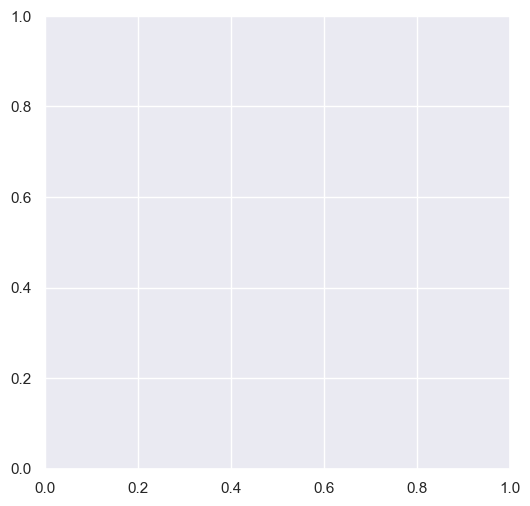

In [47]:
impact.distplot(impact['t_vaf'], color='is_artefact')